In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
from pylab import rcParams
%matplotlib inline

In [2]:
# Reading the data file and assigning it to variable df
df = pd.read_excel("SinaiDataWork.xlsx")
df.head()

,Unnamed: 0,840,1303,1313,1368,1362,1330,1304,1361,1363,...,1212,1211,1276,822,823,821,819,818,268,1244
0,1,0,3,3,0,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,3,3,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,3,3,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Removal of unwanted column and identifying the right index
df = df.set_index('Unnamed: 0')
df.head()

,840,1303,1313,1368,1362,1330,1304,1361,1363,1365,...,1212,1211,1276,822,823,821,819,818,268,1244
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,0,3,3,0,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3,3,0,0,3,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,3,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Transforming the dataset into array and assign variable X to that array so it can be used in the analyses.
X = df.to_numpy()

In [5]:
# To compute the Within Cluster Sum of Squares for numbers of clusters upto 50
wcss = []

for i in range(1, 50):
    # 1. Fit the KMeans algorithm into our data X
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 12, random_state = 42)
    kmeans.fit(X)
    
    # 2. Calculate the within cluster sum of squares and append it to wcss list (aka Inertia)
    wcss.append(kmeans.inertia_)
    

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


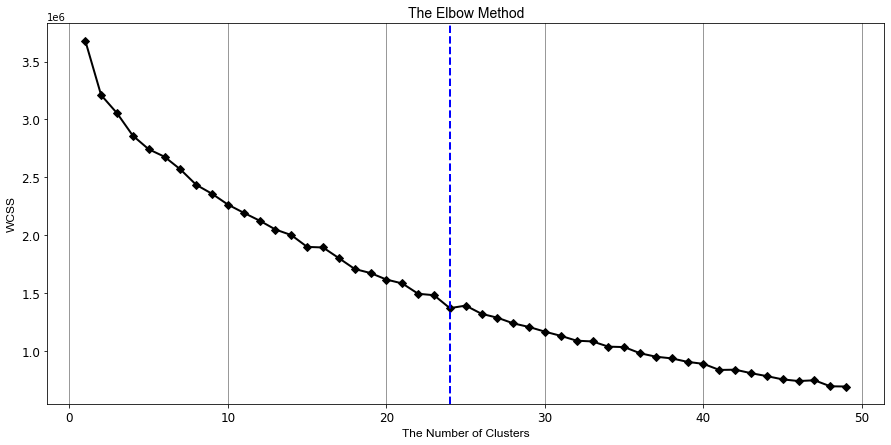

In [6]:
# Plotting the Elbow method curve

_ = plt.figure(figsize=(15,7))
_ = plt.plot(range(1, 50), wcss, linewidth = 2, color = 'black', marker = 'D', markersize = 5)
_ = plt.title('The Elbow Method', family = 'Arial', fontsize = 14, color = 'black')
_ = plt.xlabel('The Number of Clusters', family = 'Arial', fontsize = 12, color = 'black')
_ = plt.ylabel('WCSS', family = 'Arial', fontsize = 12, color = 'black')
_ = plt.xticks(fontsize = 12, color = 'black')
_ = plt.yticks(fontsize = 12, color = 'black')
_ = plt.grid(which = 'both', color = 'black', axis = 'x', alpha = 0.5)

number_of_clusters = 24 # Define this after knowing the optimal value from Elbow curve
_ = plt.axvline(x = number_of_clusters, linewidth = 2, color = 'blue', linestyle = '--')
_ = plt.show()

### As shown above, we can recognize the curve elbow (the breaking point) at the number of clusters, 24. Hence, the expected optimal number of clusters is 24.